In [83]:
from tkinter import *
import numpy as np
from neural_network import *
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageOps

In [3]:
cd /Users/Max/Documents/Studium/Master/Semester_2/Programming/Scripts/

/Users/Max/Documents/Studium/Master/Semester_2/Programming/Scripts


(60000, 28, 28)
(60000, 10)


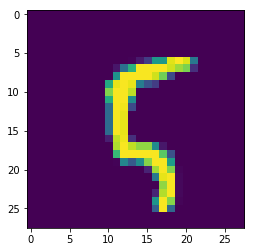

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]


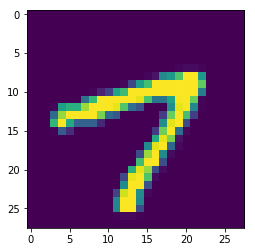

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


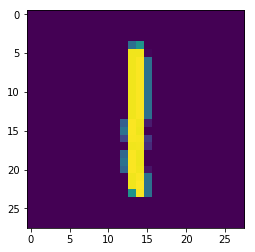

[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


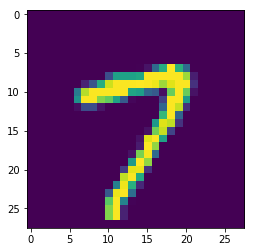

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01]


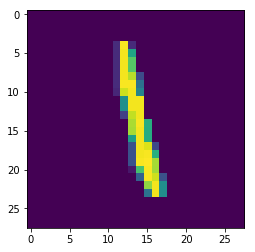

[0.01 0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [4]:
%run ./Data_preprocessing.ipynb

In [5]:
n = NeuralNetwork([784,100,100,10])

In [6]:
n.train(train_images,train_labels)

In [7]:
n.evaluate(test_images, test_labels)

Accuracy: 94.00%
Recall for 0: 97.96%
Precision for 0: 95.43%
Recall for 1: 98.85%
Precision for 1: 97.06%
Recall for 2: 91.76%
Precision for 2: 96.53%
Recall for 3: 93.86%
Precision for 3: 91.59%
Recall for 4: 92.46%
Precision for 4: 93.03%
Recall for 5: 90.13%
Precision for 5: 95.49%
Recall for 6: 96.66%
Precision for 6: 93.72%
Recall for 7: 92.02%
Precision for 7: 96.14%
Recall for 8: 91.07%
Precision for 8: 93.96%
Recall for 9: 94.35%
Precision for 9: 87.50%


In [107]:
class Gui:
    
    def __init__(self, master):
        
        # Layout and frames
        master.geometry('410x330')
        border_color='white'
        input_frame = Frame(master, highlightbackground=border_color, highlightthickness=2)
        input_frame.grid(row=2, column=0)
        feedback_frame = Frame(master, highlightbackground=border_color, highlightthickness=2)
        feedback_frame.grid(row=2, column=2)
        
        # Empty frames/labels for layout
        empty_frame_1 = Frame(master, highlightbackground=border_color, highlightthickness=2)
        empty_frame_1.grid(row=2, column=1)
        empty_label_1 = Label(empty_frame_1, text=' ', font=("Helvetica", 30))
        empty_label_1.pack()
        
        # Buttons
        self.button_reset = Button(input_frame, text='Reset', width=10, command=self.reset)
        self.button_reset.pack(side=BOTTOM)
        self.button_recognize = Button(input_frame, text='Recognize!', width=10, command=self.run_nn)
        self.button_recognize.pack(side=BOTTOM)

        # Drawing field
        sub_1 = Label(input_frame, text='Write your digit!', font=("Helvetica", 15))
        sub_1.pack(side=TOP)
        self.drawing_field = Canvas(input_frame, height=250, width=250, bg='white', cursor='cross', 
                                    highlightbackground="black", highlightthickness=2)
        self.drawing_field.pack() 
        self.drawing_field.bind("<Motion>", self.tell_me_where_you_are)
        self.drawing_field.bind("<B1-Motion>", self.draw_from_where_you_are)
        
        # Feedback field
        sub_2 = Label(feedback_frame, text='Recognized as...', font=("Helvetica", 15))
        sub_2.pack(side=TOP)
        self.prediction_field = Text(feedback_frame, height=1, width=1, font=("Helvetica", 50), bg='light grey')
        self.prediction_field.pack(side=TOP)
        
        sub_3 = Label(feedback_frame, text='Confidence...', font=("Helvetica", 15))
        sub_3.pack(side=TOP)
        self.confidence_field = Text(feedback_frame, height=1, width=4, font=("Helvetica", 50), bg='light grey')
        self.confidence_field.pack(side=TOP)
        
        sub_4 = Label(feedback_frame, text='Alternatives...', font=("Helvetica", 15))
        sub_4.pack(side=TOP)
        self.alternative_field = Text(feedback_frame, height=1, width=1, font=("Helvetica", 50), bg='light grey')
        self.alternative_field.pack(side=TOP)
        
        #PIL
        self.image=Image.new("RGB",(250,250),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

    def tell_me_where_you_are(self, event):
        self.previous_x = event.x
        self.previous_y = event.y

    def draw_from_where_you_are(self, event):
        self.x = event.x
        self.y = event.y
        self.drawing_field.create_polygon(self.previous_x, self.previous_y, self.x, self.y, width=20, outline='black')
        self.draw.line(((self.previous_x, self.previous_y),(self.x, self.y)),(1,1,1), width=20)
        self.previous_x = self.x
        self.previous_y = self.y

        img_inverted = ImageOps.invert(self.image)
        img_resized = img_inverted.resize((28,28), Image.ANTIALIAS)
        self.input_image = np.asarray(img_resized)[:,:,0] * (0.99/255) + 0.01
        
    def run_nn(self):
        output = n.run(self.input_image).T[0]
        self.prediction = np.argmax(output)
        self.confidence = np.max(output)
        self.alternative = np.argsort(output)[-2]
        self.prediction_field.insert(END, str(self.prediction))
        self.confidence_field.insert(END, '%.0f%%' %(self.confidence*100))
        if self.confidence < 0.8:
            self.alternative_field.insert(END, str(self.alternative))
        else:
            self.alternative_field.insert(END, '/')
        
    def reset(self):
        # Reset tkinter
        self.prediction_field.delete(1.0,END)
        self.confidence_field.delete(1.0,END)
        self.alternative_field.delete(1.0,END)
        self.drawing_field.delete('all')
        # Reset PIL
        self.image=Image.new("RGB",(250,250),(255,255,255))
        self.draw=ImageDraw.Draw(self.image)

if __name__ == "__main__":
    root = Tk()
    b = Gui(root)
    root.mainloop()

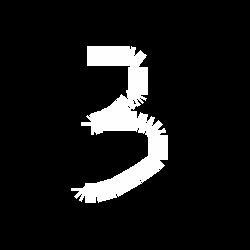

In [84]:
img_inverted = ImageOps.invert(b.image)
img_inverted

In [85]:
img_28 = img_inverted.resize((28,28), Image.ANTIALIAS)

In [86]:
img_28

In [87]:
array = np.asarray(img_28)[:,:,0] * (0.99/255) + 0.01

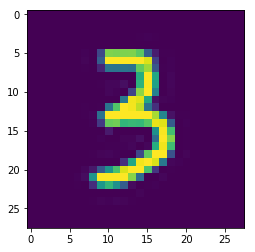

In [88]:
plt.show(plt.imshow(array))

In [89]:
array.shape

(28, 28)

In [90]:
array

array([[0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01  

In [104]:
b.input_image

array([[0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      ],
       [0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01      , 0.01      , 0.01      , 0.01      ,
        0.01      , 0.01  

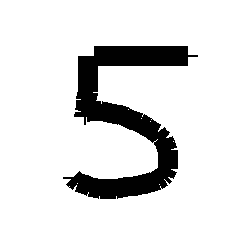

In [105]:
b.image

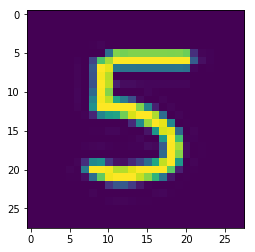

In [106]:
plt.show(plt.imshow(b.input_image))